In [1]:
from xml.dom import minidom
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib.patches import FancyBboxPatch, Rectangle

from svgpath2mpl import parse_path

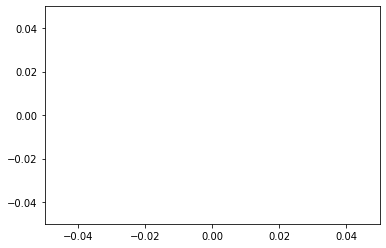

In [2]:
plt.margins(0.0, tight=True)

In [3]:
def read_svg(filename: str) -> list:
    doc = minidom.parse('src/heart.svg')
    path_strings = [
        path.getAttribute('d') 
        for path in doc.getElementsByTagName('path')
    ]
    
    marker = parse_path(path_strings[0])
    
    marker.vertices -= marker.vertices.mean(axis=0)

    return marker

In [4]:
CARD_VALUES: list = [
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9',
    '10',
    'J',
    'Q',
    'K'
]
    
SYMBOLS: list = [
    r'$\spadesuit$',
    read_svg('src/heart.svg'),
    '*',
    r'$\clubsuit$',
    'D'
]
    
SIZES: list = [
    1,
    1,
    1,
    1,
    0.5
]

In [5]:
class Card:
    WIDTH: float = 2.7
    HEIGHT: float = 3.9
    SIZE_SCALER: int = 1.25e3
    ENGRAVING_COLOR: str = 'r'
    CUT_COLOR: str = 'k'
        
    SYMBOL_NAMES: dict = {
        r'$\spadesuit$': 'Spade',
        'Heart': 'Heart',
        '*': 'Star',
        r'$\clubsuit$': 'Club',
        'D': 'Diamond',
        r'$\S$': 'Joker'
    }
    
    def __init__(self, value, symbol, size: float = 1):
        self._value = value
        self._symbol = symbol
        self._size = size
        
    def is_heart(self) -> bool:
        return not type(self._symbol) is str
    
    def get_symbol_name(self) -> str:
        symbol = self._symbol
        if self.is_heart():
            symbol = 'Heart'
        
        return self.SYMBOL_NAMES[
            symbol
        ]
        
    def __repr__(self) -> str:
        symbol = self.get_symbol_name()
            
        return f"{symbol}({self._value})[{self._size}]"
    
    @staticmethod
    def get_ranges(axes: plt.Axes):
        x_size = axes.get_xlim()[1]
        y_size = axes.get_ylim()[1]
        return (-x_size, x_size, 2 * x_size), (-y_size, y_size, 2 * y_size)
    
    def plot(self, save: bool = False):
        fig, ax = plt.subplots(
            figsize=(
                self.WIDTH / 2.54,
                self.HEIGHT / 2.54
            )
        )
        
        ax.scatter(
            [0], 
            [0], 
            marker=self._symbol,
            s=self.SIZE_SCALER * self._size,
            color=self.ENGRAVING_COLOR
        )
        
        (x_min, x_max, x_range), (y_min, y_max, y_range) = self.get_ranges(ax)
                
        ax.text(
            0,
            y_max * 0.85,
            self._value,
            size=35,
            ha='center',
            va='center',
            color=self.ENGRAVING_COLOR
        )
        
        new_ymin = y_min * 0.5
        new_ymax = y_max - new_ymin
        
        offset = y_range * 0.2
                
        p_bbox = FancyBboxPatch(
            (x_min, new_ymin - offset / 2),
            x_range,
            y_range + offset,
            lw=2,
            boxstyle="round, pad=-0.0040, rounding_size=0.015",
            ec=self.ENGRAVING_COLOR,
            fc='none',
            mutation_aspect=4
        )
    
        ax.add_patch(p_bbox)
        
        border = Rectangle(
            (x_min, new_ymin), 
            x_range, 
            y_range,
            ec=self.CUT_COLOR,
            fc='none',
            lw=2
        )
        
        ax.add_patch(
            border
        )
        
        fig.patch.set_visible(False)
        ax.axis('off')
        
        ax.set_ylim(
            new_ymin,
            new_ymax
        )
        
        if save:
            symbol = self.get_symbol_name()
            
            fig.savefig(
                f"dst/individual/{symbol}_{self._value}.svg",
                bbox_inches='tight',
                pad_inches=0,#1e-2,
                dpi=300
            )
        
        return fig, ax

In [6]:
CARDS = [
    Card(value, symbol, size)
    for symbol, size in zip(SYMBOLS, SIZES) for value in CARD_VALUES
] + [
# CARDS = [
    Card('', r'$\S$', 1)
]

In [7]:
for card in CARDS:
    card.plot(save=True)
    plt.close()